# Project1 : Unsupervised Learning

Dataset: cars-dataset.csv

Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

### Steps to follow:

->EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

->Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset)

->Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters

->Use linear regression model on different clusters separately and print the coefficients of the models individually


In [2]:
from scipy.stats import norm
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
dataset = pd.read_csv('cars-dataset.csv')
dataset.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
# Lets check if there is any missing values.
dataset.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

#### EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

In [5]:
#Columns present in the dataset
dataset.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [6]:
# Converting columns into list
dataset.columns.tolist()

['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']

In [7]:
# Checking the datatypes
dataset.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [8]:
# So "hp" contains object type.

In [9]:
# Now let's check if any nonnumeric value is present in the dataset
dataset.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
#Let's check how many "?" present in the hp column and that has to be replaced.
dataset.hp.value_counts()
print("There are total", (dataset.hp == "?").sum(), "? character that need to be replaced!")

There are total 6 ? character that need to be replaced!


In [11]:
dataset = dataset[dataset.hp != '?']
dataset.hp.value_counts()
print("So now there are", (dataset.hp == "?").sum(), "? that need to be replaced!")

So now there are 0 ? that need to be replaced!


In [12]:
# Let us replace ?" with '0' so that we can convert the column to a integer
dataset.hp.replace('?', '0', inplace=True)
dataset.hp = dataset.hp.astype(dtype=int)

In [13]:
dataset.dtypes

car name     object
cyl           int64
disp        float64
hp            int32
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [14]:
# We can see hp column is not converted to integer type
# We can crosscheck whether ? has already been replaced or not.

In [15]:
dataset.hp.value_counts()

150    22
90     20
88     19
110    18
100    17
95     14
75     14
105    12
67     12
70     12
65     10
85      9
97      9
80      7
145     7
140     7
72      6
68      6
78      6
92      6
84      6
60      5
170     5
175     5
180     5
115     5
71      5
86      5
130     5
76      4
       ..
66      1
230     1
82      1
89      1
220     1
210     1
208     1
200     1
193     1
167     1
158     1
152     1
149     1
148     1
142     1
138     1
137     1
135     1
133     1
132     1
122     1
116     1
113     1
108     1
107     1
103     1
94      1
93      1
91      1
102     1
Name: hp, Length: 93, dtype: int64

In [16]:
# Lets check the shape
dataset.shape

(392, 8)

In [17]:
# Now lets check how the data has been spread
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


### Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset)

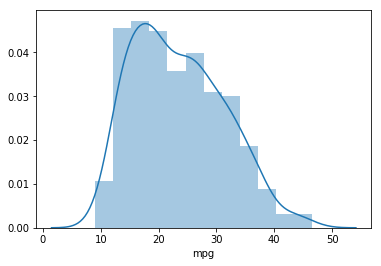

In [18]:
# Distribution plot of mpg column using Seaborn
sns.distplot(dataset['mpg'])

In [19]:
# Checking the skewness and kurtosis of the distribution graph for kpg column
print("Skewness: %f" % dataset['mpg'].skew())
print("Kurtosis: %f" % dataset['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [20]:
# Lets standardized the graph 
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b
data_scale = dataset.copy()
data_scale ['disp'] = scale(data_scale['disp'])
data_scale['hp'] = scale(data_scale['hp'])
data_scale ['wt'] = scale(data_scale['wt'])
data_scale ['acc'] = scale(data_scale['acc'])
data_scale['mpg'] = scale(data_scale['mpg'])
data_scale.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,0.617571,0.456522,0.536150,0.238095,70,0.239362
1,buick skylark 320,8,0.728682,0.646739,0.589736,0.208333,70,0.159574
2,plymouth satellite,8,0.645995,0.565217,0.516870,0.178571,70,0.239362
3,amc rebel sst,8,0.609819,0.565217,0.516019,0.238095,70,0.186170
4,ford torino,8,0.604651,0.510870,0.520556,0.148810,70,0.212766


In [21]:
# Dataset is scaled now to the same range of [0,1]. This will help us visualize data better.
#We used a copy of the original data-set for this as we will use the data-set later when we build regression models.

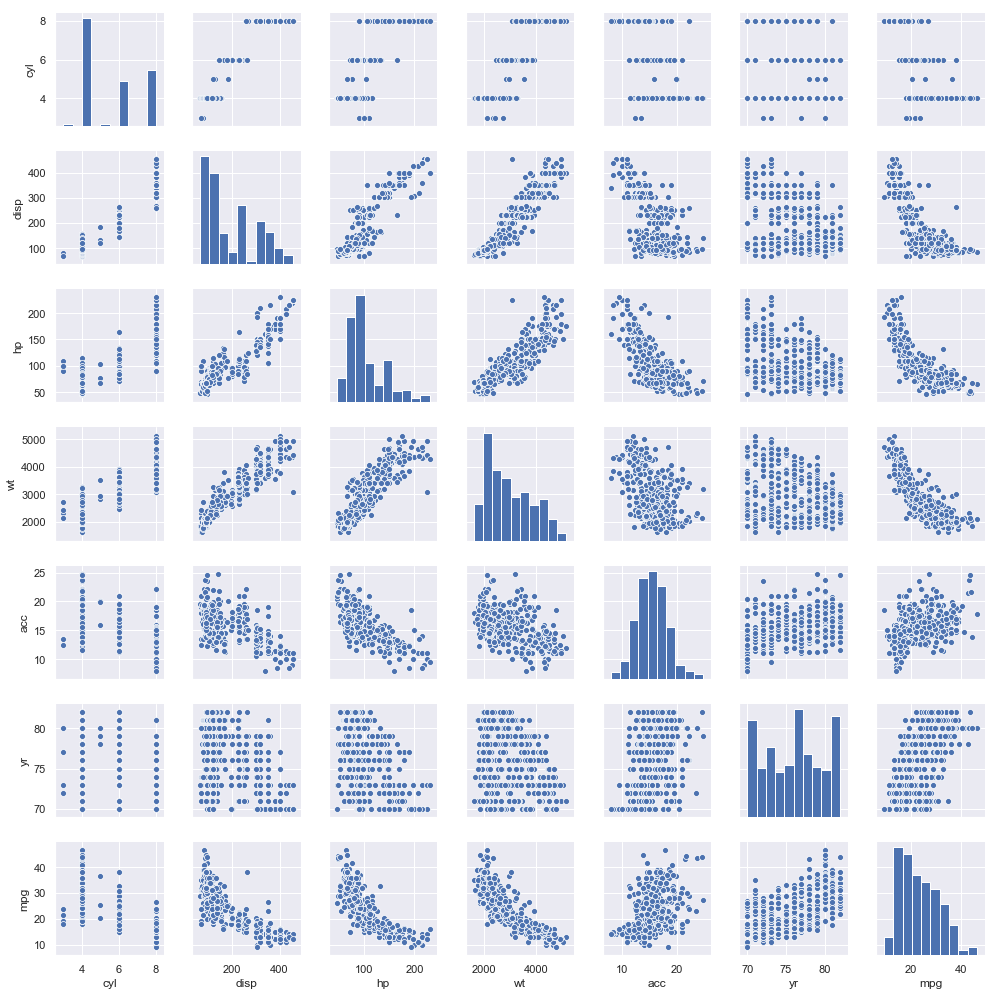

In [22]:
# Lets plot scatter plot to visualize the data 
sns.set()
sns.pairplot(dataset, size = 2.0)
plt.show()

### Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters

In [23]:
datasetForKmeans=dataset.drop("car name",axis=1)
datasetForKmeans.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


#### Grouping of data having similar clusters

#### K Means Clustering

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [25]:
km.fit(datasetForKmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
#calculating Centroids
centroid = km.cluster_centers_
print(centroid.shape)
print(centroid)

(3, 7)
[[5.81967213e+00 2.12614754e+02 1.05401639e+02 3.16258197e+03
  1.59040984e+01 7.63524590e+01 2.07893443e+01]
 [4.03888889e+00 1.07208333e+02 7.71666667e+01 2.22282778e+03
  1.63344444e+01 7.67111111e+01 2.96516667e+01]
 [7.86666667e+00 3.44144444e+02 1.57811111e+02 4.23632222e+03
  1.34633333e+01 7.40111111e+01 1.46355556e+01]]


### Method 1 : Elbow diagram

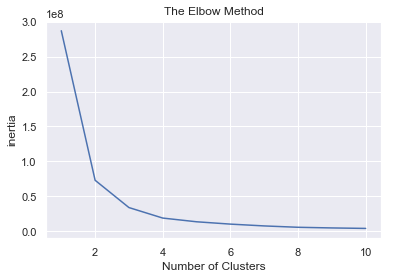

In [27]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter =300, n_init=10, random_state=0)
    kmeans.fit(datasetForKmeans)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

### Method 2 : Elbow diagram

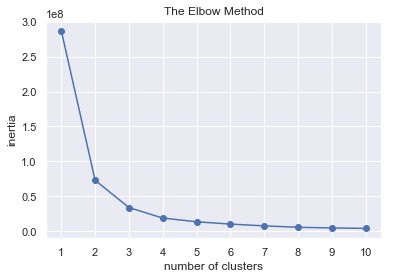

In [28]:
ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters= k)
    
    # Fit model to samples
    kmeans.fit(datasetForKmeans)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [29]:
datasetForKmeans['clustersLabels']=km.predict(datasetForKmeans)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C1F1E10>,
      dtype=object)

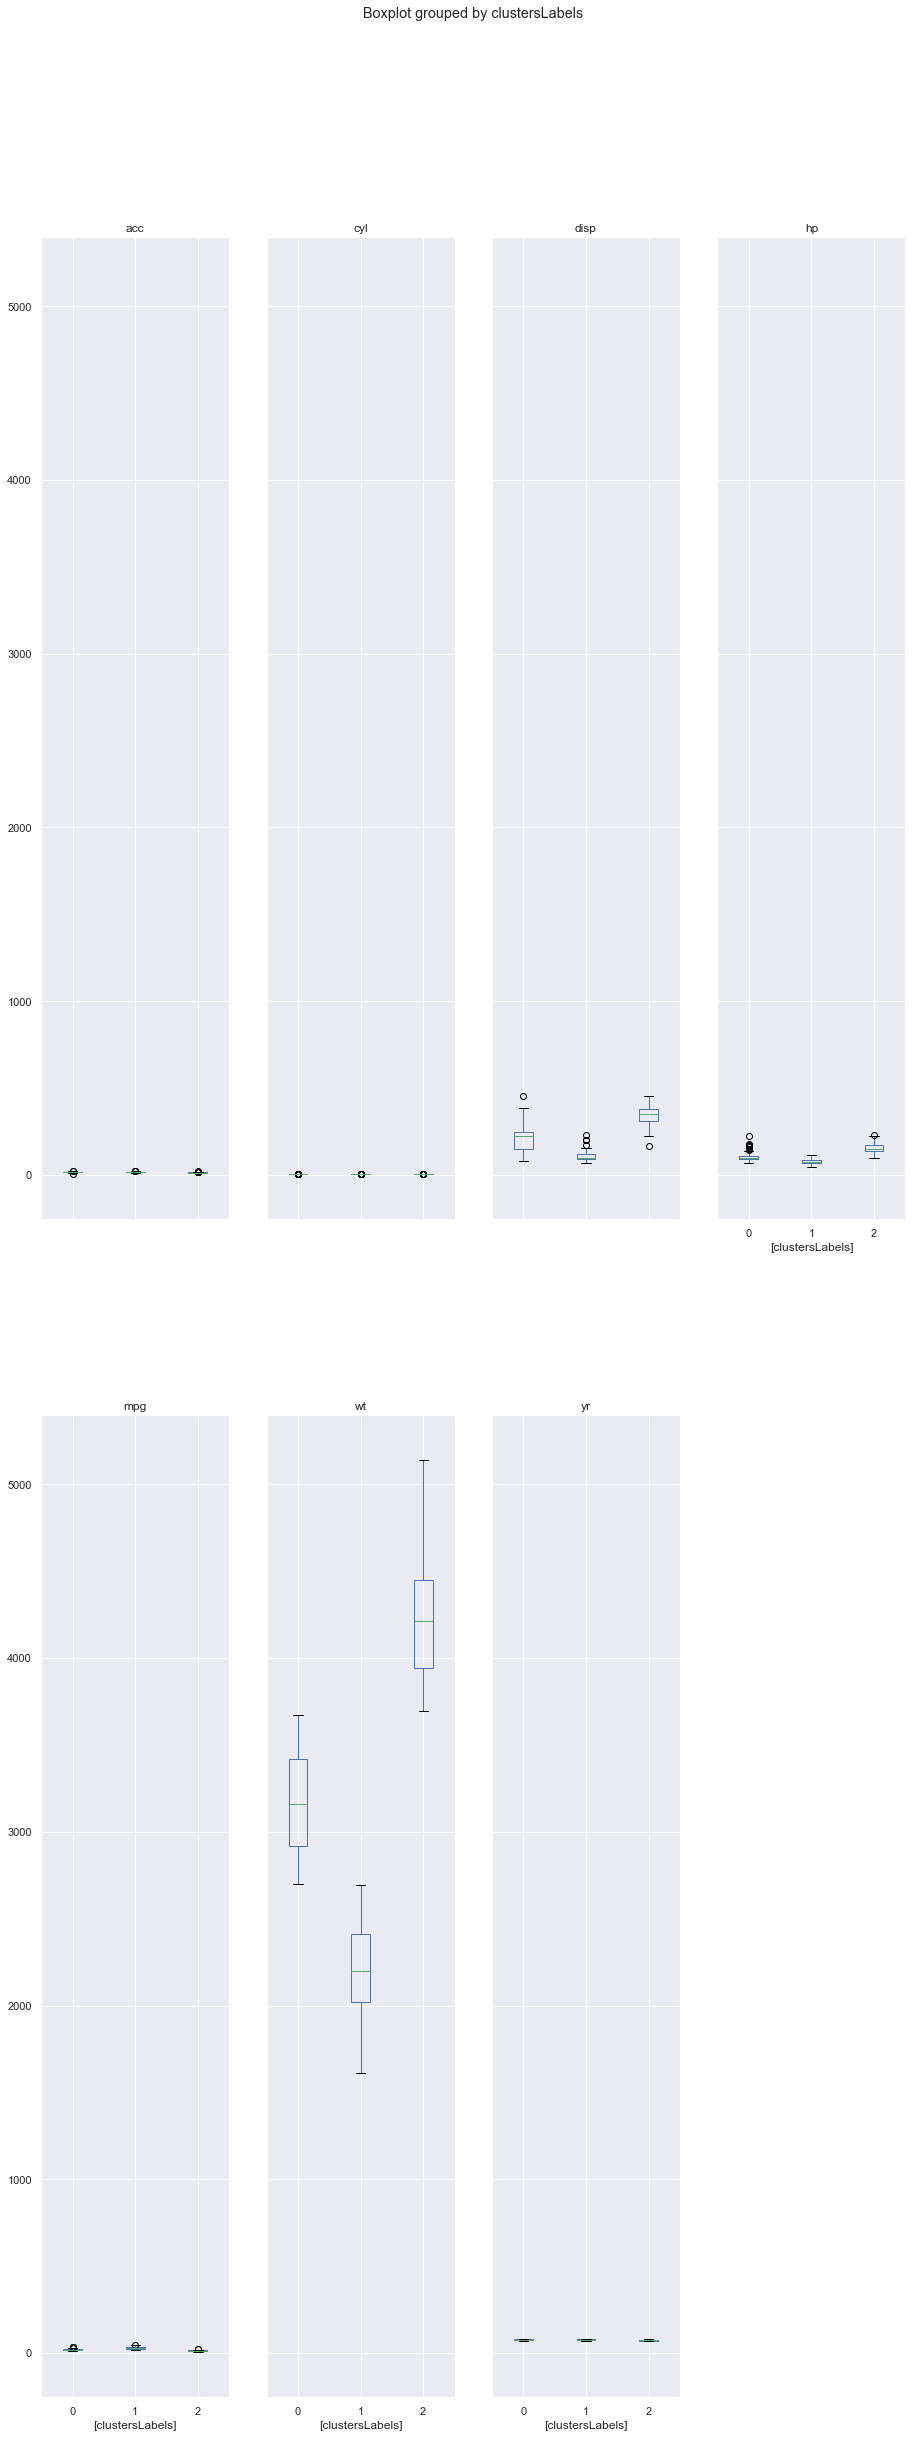

In [30]:
# Creating boxplot
datasetForKmeans.boxplot(by='clustersLabels',layout=(2,4),figsize=(15,40))

### Calculating distortions for 1 to 10 clusters

In [31]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(1,10):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i)
    
    #Fit on the data
    km.fit(datasetForKmeans)
    
    #Add cluster information for each record in dataframe
    datasetForKmeans['k_'+str(i)] = km.predict(datasetForKmeans)
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

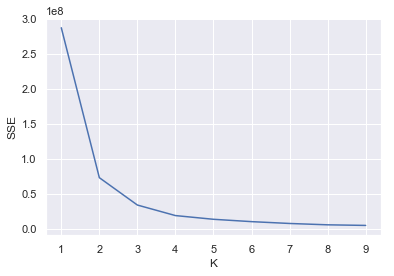

In [32]:
sns.lineplot(x='K',y='SSE',data=sse_df)

#### Visualize clusters with K=3

In [33]:
plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

from sklearn import metrics

Input Data and Shape
(398, 8)


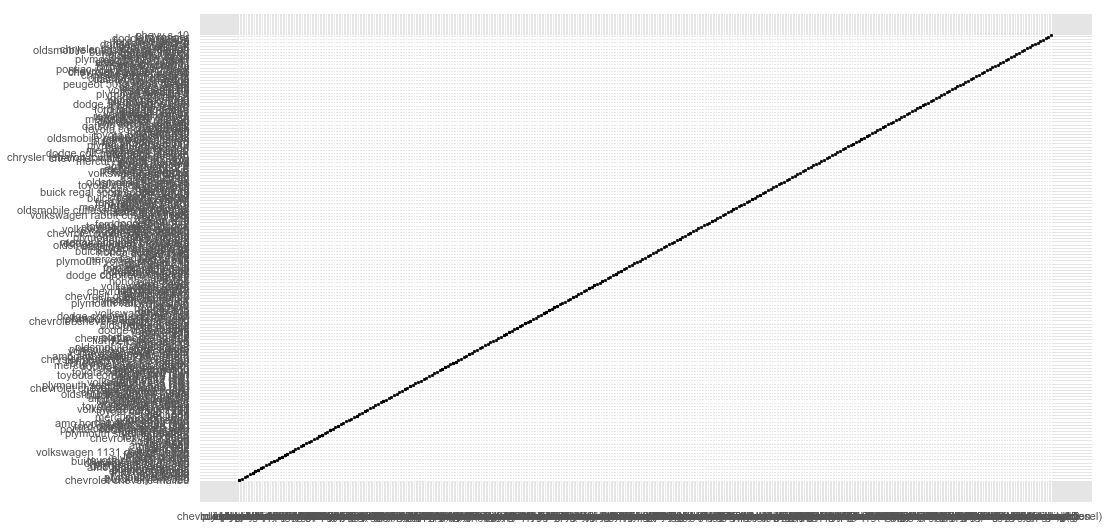

In [34]:
dataset = pd.read_csv('cars-dataset.csv')

print("Input Data and Shape")

print(dataset.shape)

dataset.head()



# Getting the values and plotting it

f1 = dataset['car name'].values

f2 = dataset['car name'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

In [35]:
from sklearn.decomposition import PCA


kmeans = KMeans(n_clusters=3)
# This is to predict the clusters belongs to which observation. It will return as single vector. All the cluster values to be stored in new column 

datasetForKmeans["kmeans"] = kmeans.fit_predict(datasetForKmeans[datasetForKmeans.columns[:7]])

In [36]:
# Princople Component Separation for 2-Dimensional picture (PCA)
cols = datasetForKmeans.columns[1:]
pca = PCA(n_components=2)
datasetForKmeans['x'] = pca.fit_transform(datasetForKmeans[cols])[:,0]
datasetForKmeans['y'] = pca.fit_transform(datasetForKmeans[cols])[:,1]
datasetForKmeans = datasetForKmeans.reset_index()
datasetForKmeans.tail()

,index,cyl,disp,hp,wt,acc,yr,mpg,clustersLabels,k_1,...,k_3,k_4,k_5,k_6,k_7,k_8,k_9,kmeans,x,y
387,393,4,140.0,86,2790,15.6,82,27.0,0,0,...,0,3,2,3,3,0,3,0,-193.179386,-34.504004
388,394,4,97.0,52,2130,24.6,82,44.0,1,0,...,2,1,0,1,1,4,1,1,-854.714146,-6.173009
389,395,4,135.0,84,2295,11.6,82,32.0,1,0,...,2,1,0,1,1,4,1,1,-685.227284,20.031924
390,396,4,120.0,79,2625,18.6,82,28.0,1,0,...,2,3,2,3,3,6,3,1,-359.537695,-35.699598
391,397,4,119.0,82,2720,19.4,82,31.0,0,0,...,0,3,2,3,3,6,3,0,-265.257291,-47.317416


### Visualizing the cluster

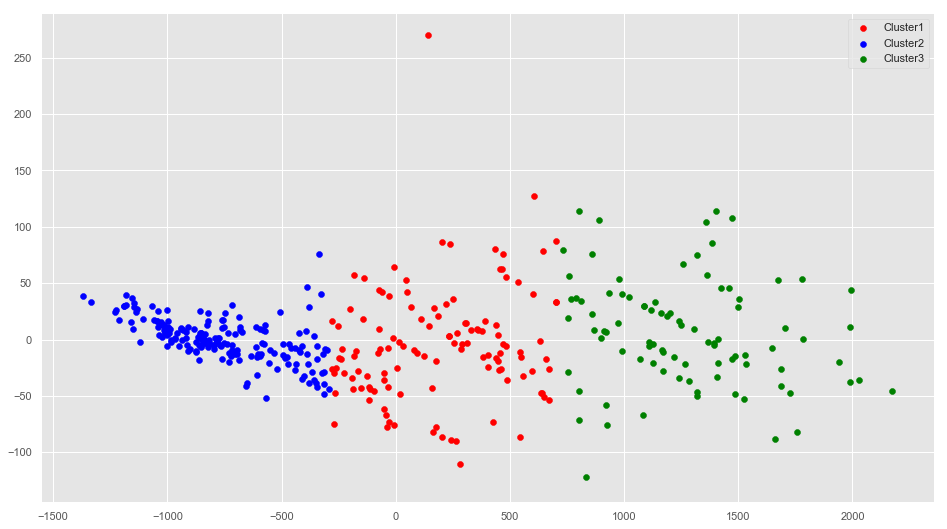

In [37]:
trace0 = plt.scatter(x = datasetForKmeans[datasetForKmeans.kmeans ==0]["x"],y = datasetForKmeans[datasetForKmeans.kmeans ==0]["y"],  label="Cluster1", color = 'red')
trace1 = plt.scatter(x = datasetForKmeans[datasetForKmeans.kmeans ==1]["x"],y = datasetForKmeans[datasetForKmeans.kmeans ==1]["y"],   label="Cluster2", color = 'blue')
trace2 = plt.scatter(x = datasetForKmeans[datasetForKmeans.kmeans ==2]["x"],y = datasetForKmeans[datasetForKmeans.kmeans ==2]["y"],   label="Cluster3", color = 'green')

datan = [trace0,trace1,trace2]
plt.legend()
plt.show(datan)

### Visualizing the cluster with centroid

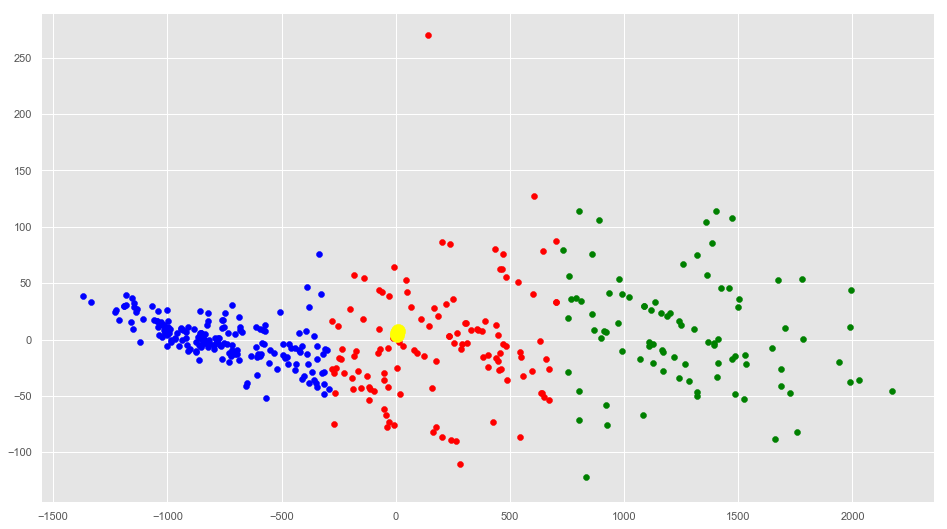

In [38]:
trace0 = plt.scatter(x = datasetForKmeans[datasetForKmeans.kmeans ==0]["x"],y = datasetForKmeans[datasetForKmeans.kmeans ==0]["y"],  label="Cluster1", color = 'red')
trace1 = plt.scatter(x = datasetForKmeans[datasetForKmeans.kmeans ==1]["x"],y = datasetForKmeans[datasetForKmeans.kmeans ==1]["y"],   label="Cluster2", color = 'blue')
trace2 = plt.scatter(x = datasetForKmeans[datasetForKmeans.kmeans ==2]["x"],y = datasetForKmeans[datasetForKmeans.kmeans ==2]["y"],   label="Cluster3", color = 'green')
centroid = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0],  s=200, label="Centroid", color = 'yellow')

In [39]:
#calculating Centroids
centroid = kmeans.cluster_centers_
print(centroid.shape)
print(centroid)

(3, 7)
[[5.81967213e+00 2.12614754e+02 1.05401639e+02 3.16258197e+03
  1.59040984e+01 7.63524590e+01 2.07893443e+01]
 [4.03888889e+00 1.07208333e+02 7.71666667e+01 2.22282778e+03
  1.63344444e+01 7.67111111e+01 2.96516667e+01]
 [7.86666667e+00 3.44144444e+02 1.57811111e+02 4.23632222e+03
  1.34633333e+01 7.40111111e+01 1.46355556e+01]]


## Use linear regression model on different clusters separately and print the coefficients of the models individual

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
# Storing the each cluster data in the dataset
datasetForKmeans["cluster1"] = datasetForKmeans.kmeans==0
datasetForKmeans["cluster2"] = datasetForKmeans.kmeans==1
datasetForKmeans["cluster3"] = datasetForKmeans.kmeans==2
datasetForKmeans.head()

,index,cyl,disp,hp,wt,acc,yr,mpg,clustersLabels,k_1,...,k_6,k_7,k_8,k_9,kmeans,x,y,cluster1,cluster2,cluster3
0,0,8,307.0,130,3504,12.0,70,18.0,0,0,...,5,4,5,0,0,536.466134,50.826833,True,False,False
1,1,8,350.0,165,3693,11.5,70,15.0,2,0,...,5,4,7,4,2,730.386820,79.168590,False,False,True
2,2,8,318.0,150,3436,11.0,70,18.0,0,0,...,5,0,5,0,0,471.004384,75.424751,True,False,False
3,3,8,304.0,150,3433,12.0,70,16.0,0,0,...,5,0,5,0,0,466.439555,62.548960,True,False,False
4,4,8,302.0,140,3449,10.5,70,17.0,0,0,...,5,0,5,0,0,481.697965,55.775015,True,False,False


### Creating dataset with each cluster separately.
​

In [42]:


XC1 = datasetForKmeans.drop(["kmeans", "x","y","cluster2","cluster3","index","clustersLabels","k_1","k_2","k_3","k_4","k_5","k_6","k_7","k_8","k_9"], axis=1)
XC2 = datasetForKmeans.drop(["kmeans", "x","y","cluster1","cluster3","index","clustersLabels","k_1","k_2","k_3","k_4","k_5","k_6","k_7","k_8","k_9"], axis=1)
XC3 = datasetForKmeans.drop(["kmeans", "x","y","cluster1","cluster2","index","clustersLabels","k_1","k_2","k_3","k_4","k_5","k_6","k_7","k_8","k_9"], axis=1)

##### Check the columns of each dataset with all three Clusters

In [43]:
XC1.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'cluster1'], dtype='object')

In [44]:
XC2.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'cluster2'], dtype='object')

In [45]:
XC3.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'cluster3'], dtype='object')

In [46]:
Cluster1True =  XC1[XC1.cluster1==True]

# Drop the Cluster1 column 
Cluster1True = Cluster1True.drop(["cluster1"], axis=1)

Cluster1True.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0
10,8,383.0,170,3563,10.0,70,15.0


In [47]:
Cluster1True.shape

(122, 7)

###### This is to store the data points that belongs to cluster2 - True

In [48]:
Cluster2True =  XC2[XC2.cluster2==True]

# Drop the Cluster3 column 
Cluster2True = Cluster2True.drop(["cluster2"], axis=1)
Cluster2True.head()

,cyl,disp,hp,wt,acc,yr,mpg
14,4,113.0,95,2372,15.0,70,24.0
17,6,200.0,85,2587,16.0,70,21.0
18,4,97.0,88,2130,14.5,70,27.0
19,4,97.0,46,1835,20.5,70,26.0
20,4,110.0,87,2672,17.5,70,25.0


In [49]:
Cluster2True.shape

(180, 7)

In [50]:
# This is to store the data points that belongs to cluster2 - True

In [51]:

Cluster3True =  XC3[XC3.cluster3==True]

# Drop the Cluster3 column 
Cluster3True = Cluster3True.drop(["cluster3"], axis=1)
Cluster3True.head()

,cyl,disp,hp,wt,acc,yr,mpg
1,8,350.0,165,3693,11.5,70,15.0
5,8,429.0,198,4341,10.0,70,15.0
6,8,454.0,220,4354,9.0,70,14.0
7,8,440.0,215,4312,8.5,70,14.0
8,8,455.0,225,4425,10.0,70,14.0


In [52]:
Cluster3True.shape

(90, 7)

In [53]:
#Cluster1True + Cluster2True + Cluster3True = 392 rows. Hense the distribution of datapoints is accurate

In [54]:
# Splitting the data for each cluster1 into dependent and independent variables

In [55]:
XCluster1True = Cluster1True.drop(["mpg"], axis=1)
y1 = Cluster1True["mpg"]

In [56]:
XCluster1True.shape

(122, 6)

In [57]:
y1.shape

(122,)

In [58]:
# Splitting the data for each cluster2 into dependent and independent variables

In [59]:
XCluster2True = Cluster2True.drop(["mpg"], axis=1)
y2 = Cluster2True["mpg"]

In [60]:
y2.shape

(180,)

In [61]:
XCluster2True.shape

(180, 6)

In [62]:
# Splitting the data for each cluster3 into dependent and independent variables

In [63]:
XCluster3True = Cluster3True.drop(["mpg"], axis=1)
y3 = Cluster3True["mpg"]

In [64]:
XCluster3True.shape

(90, 6)

In [65]:
y3.shape

(90,)

In [66]:
# Import the library and split the data for train and test for all three clusters

In [67]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(Cluster1True,y1,test_size=0.3)
X2_train,X2_test,y2_train,y2_test = train_test_split(Cluster2True,y2,test_size=0.3)
X3_train,X3_test,y3_train,y3_test = train_test_split(Cluster3True,y3,test_size=0.3)



# print("Training Dataset Count: " + str(X1_train.count()))
# print("Test Dataset Count: " + str(X1_test.count()))

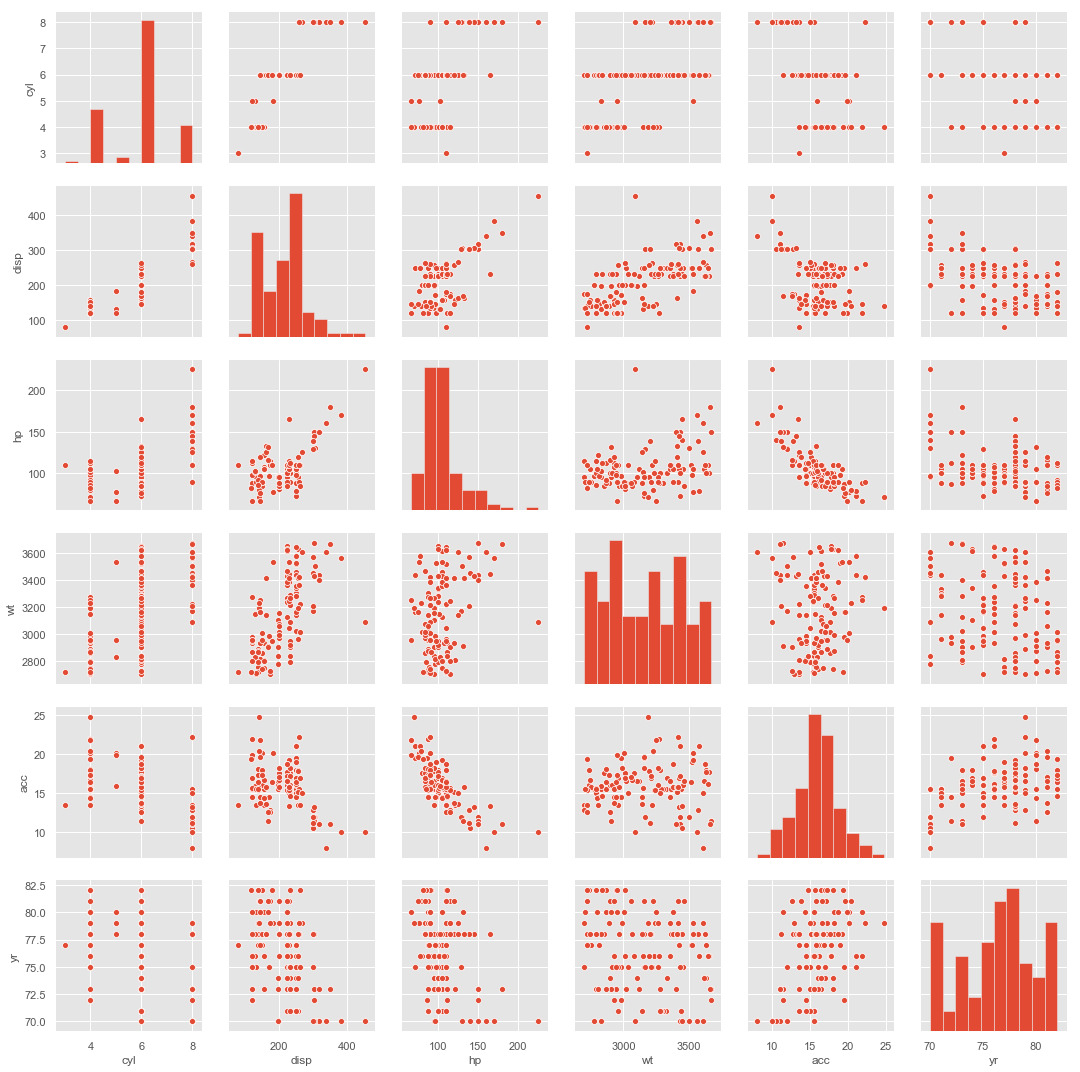

In [68]:
sns.pairplot(XCluster1True)

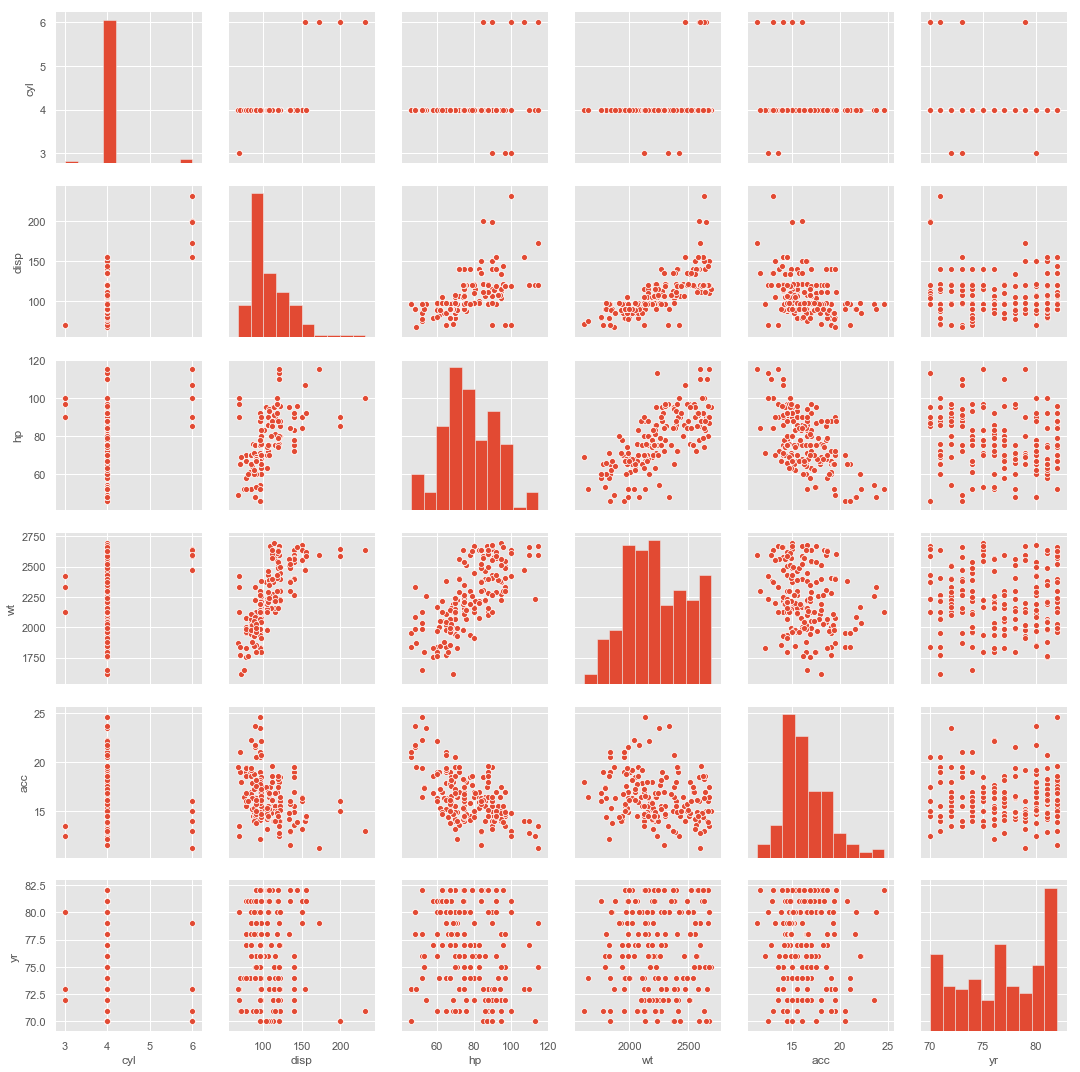

In [69]:
sns.pairplot(XCluster2True)

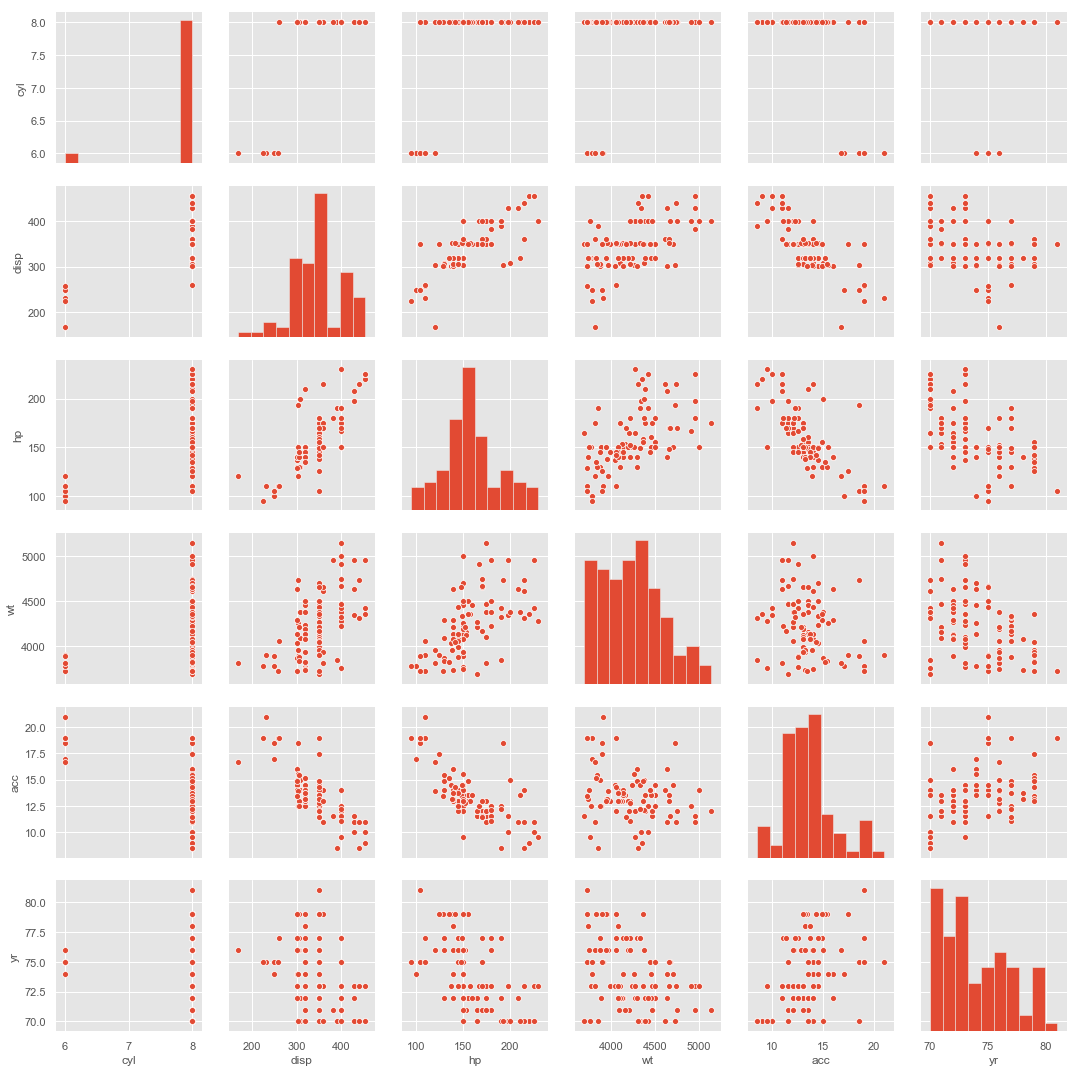

In [70]:
sns.pairplot(XCluster3True)

### Linear Regression for Cluster1¶

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
# TRain the model
regressor1 = LinearRegression()

regressor1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
y1_predicted = regressor1.predict(X1_test)
y1_predicted

array([19.9, 21. , 11. , 14. , 19. , 18. , 20.6, 20.2, 19. , 23. , 23. ,
       16. , 15. , 15. , 17.6, 24.3, 18.1, 14. , 13. , 19. , 17.7, 20.5,
       18. , 17. , 18. , 18. , 17.5, 18.5, 22.3, 17. , 20. , 19. , 20.6,
       24. , 18. , 20.3, 20. ])

In [74]:
# Root Mean Square

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_true=y1_test,y_pred=y1_predicted))
rmse

1.057782232557098e-14

In [76]:
# Finding the coefficien
coef1 = regressor1.coef_
coef1

array([-1.72549610e-18,  1.49186219e-16,  1.19262239e-18, -1.56125113e-17,
        1.57649772e-16, -6.81407513e-16,  1.00000000e+00])

In [77]:
# Finding the intercept
intr1 = regressor1.intercept_ 
intr1

7.105427357601002e-14

In [78]:
# Score the train
regressor1.score(X1_train, y1_train)

1.0

In [79]:
# Score the test
regressor1.score(X1_test, y1_test)

1.0

In [80]:
y1plot = coef1 * X1_train + intr1
y1plot.head()

,cyl,disp,hp,wt,acc,yr,mpg
330,7.104392e-14,9.611756e-14,7.121170e-14,2.562187e-14,7.285148e-14,1.654167e-14,32.7
205,7.104737e-14,9.044848e-14,7.117592e-14,2.187486e-14,7.352937e-14,1.926730e-14,20.0
199,7.104392e-14,1.083508e-13,7.118546e-14,1.414667e-14,7.360820e-14,1.926730e-14,18.5
312,7.104737e-14,9.194034e-14,7.115922e-14,2.624637e-14,7.390773e-14,1.654167e-14,26.4
98,7.104392e-14,1.056655e-13,7.117354e-14,2.507543e-14,7.357667e-14,2.131153e-14,18.0


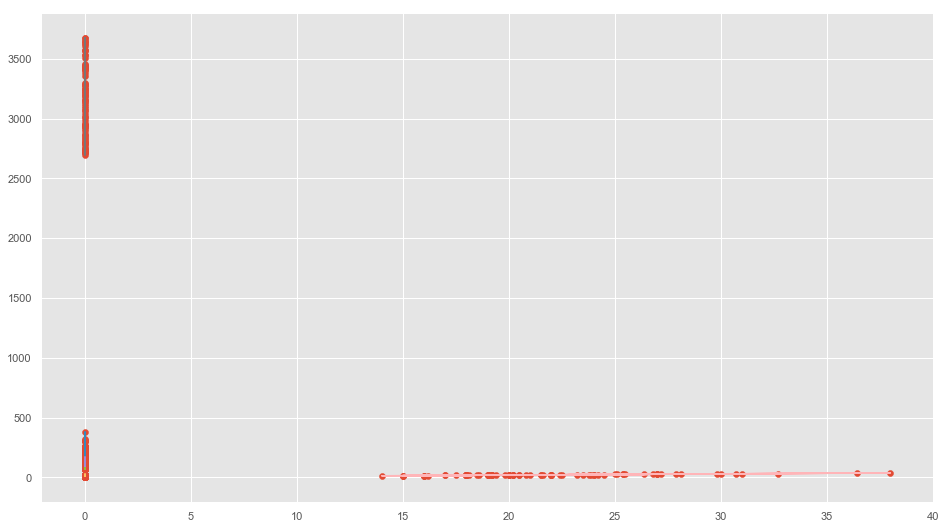

In [81]:
plt.plot(y1plot,X1_train,)
plt.scatter(y1plot,X1_train)

#### Linear Regression for Cluster2

In [82]:
# Train the model
regressor2 = LinearRegression()

regressor2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
y2_predicted = regressor2.predict(X2_test)
y2_predicted

array([19. , 44.6, 32. , 35. , 25. , 36.1, 21. , 28. , 27. , 44. , 28. ,
       25. , 26. , 24. , 22. , 23. , 26. , 33.7, 31.5, 34.5, 36.1, 25. ,
       26. , 34.4, 30.9, 23. , 28. , 31. , 32.8, 39. , 19. , 30. , 32.4,
       27.2, 18. , 28.8, 23. , 32.1, 31.9, 24. , 36. , 31. , 23. , 28. ,
       21. , 22. , 27. , 21.5, 27.4, 33.5, 31. , 33. , 26.6, 27.5])

In [84]:
# Root mean Square
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_true=y2_test,y_pred=y2_predicted))
rmse

1.0436533862428997e-14

In [85]:
# Ffinding the coefficient
coef2 = regressor2.coef_
coef2

array([-7.01965754e-17, -2.32452946e-16, -5.70290343e-16,  1.73472348e-17,
       -5.48503300e-15, -2.27411406e-16,  1.00000000e+00])

In [86]:
# FInding the intercept
intr2 = regressor2.intercept_ 
intr2

1.3855583347321954e-13

In [87]:
# Score the train
regressor2.score(X2_train, y2_train)

1.0

In [88]:
# Score the test
regressor2.score(X2_test, y2_test)

1.0

In [89]:
# Building the formula for Multiple Linear Regression (y = mx + c)
y2plot = coef2 * X2_train + intr2
y2plot.head()

,cyl,disp,hp,wt,acc,yr,mpg
17,1.381347e-13,9.206524e-14,9.008115e-14,1.834331e-13,5.079531e-14,1.226370e-13,21.0
165,1.382750e-13,1.160079e-13,9.578406e-14,1.762167e-13,5.079531e-14,1.215000e-13,29.0
276,1.382750e-13,1.178675e-13,9.806522e-14,1.730768e-13,5.682884e-14,1.208177e-13,31.5
324,1.382750e-13,1.176351e-13,1.111819e-13,1.790616e-13,8.560551e-15,1.203629e-13,43.4
54,1.382750e-13,1.160079e-13,1.043384e-13,1.703707e-13,3.434021e-14,1.224096e-13,27.0


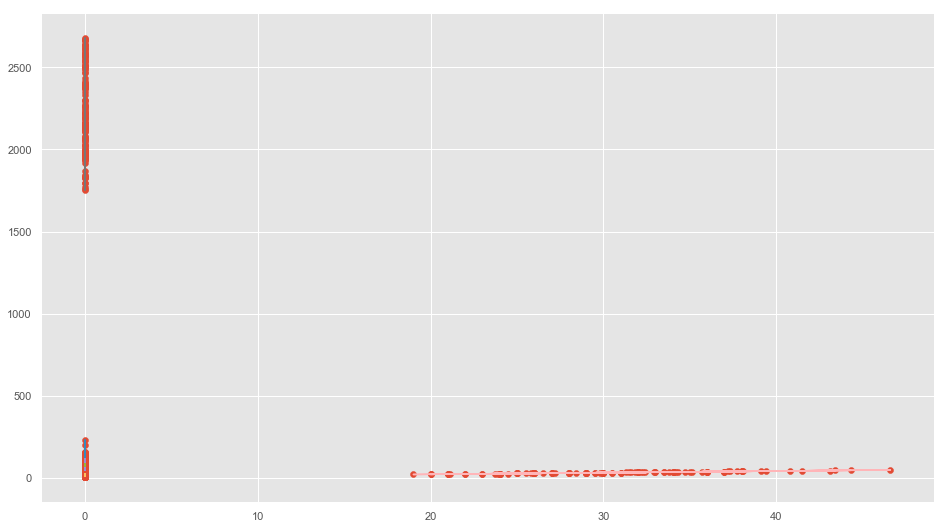

In [90]:
plt.plot(y2plot,X2_train,)
plt.scatter(y2plot,X2_train)

#### Linear Regression for Cluster3

In [91]:
regressor3 = LinearRegression()

regressor3.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
y3_predicted = regressor3.predict(X3_test)
y3_predicted

array([16. , 13. , 23. , 16.5, 12. , 16. , 15.5, 18.2, 13. , 15. , 15.5,
       15.5, 14. , 11. , 14. , 12. , 13. , 15. , 13. , 10. , 14. , 14. ,
       11. , 10. , 12. , 13. , 14. ])

In [93]:
# Root Mean Square
rmse = sqrt(mean_squared_error(y_true=y3_test,y_pred=y3_predicted))
rmse

9.217550715855017e-15

In [94]:
# Find the coefficient
coef3 = regressor3.coef_
coef3

array([ 3.88284289e-16,  2.81458884e-16, -1.31513724e-16, -2.51534904e-17,
        9.51821087e-16,  7.51800186e-16,  1.00000000e+00])

In [95]:
# Find the intercept
intr3 = regressor3.intercept_ 
intr3

-3.197442310920451e-14

In [96]:
# Score the train
regressor3.score(X3_train, y3_train)

1.0

In [97]:
# Score the test
regressor3.score(X3_test, y3_test)

1.0

In [99]:
# Building the formula for Multiple Linear Regression (y = mx + c)
y3plot = coef3 * X3_train + intr3
y3plot.head()

,cyl,disp,hp,wt,acc,yr,mpg
211,-2.886815e-14,6.653619e-14,-5.104391e-14,-1.339718e-13,-2.055257e-14,2.516239e-14,13.0
1,-2.886815e-14,6.653619e-14,-5.367419e-14,-1.248663e-13,-2.102848e-14,2.065159e-14,15.0
287,-2.886815e-14,6.653619e-14,-5.235905e-14,-1.416436e-13,-1.779229e-14,2.741779e-14,16.9
154,-2.886815e-14,8.060913e-14,-5.433176e-14,-1.493909e-13,-2.102848e-14,2.441059e-14,16.0
74,-2.886815e-14,5.752950e-14,-5.170148e-14,-1.345252e-13,-1.864893e-14,2.215519e-14,14.0


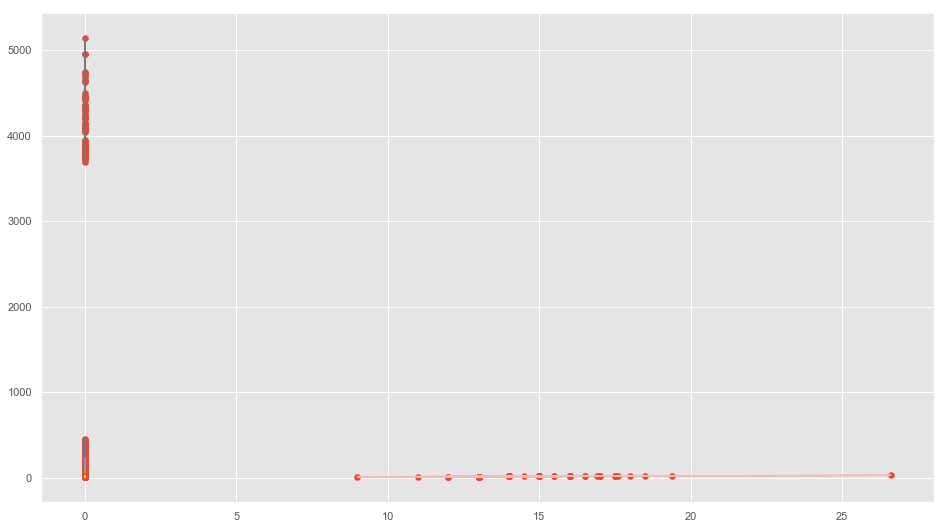

In [100]:
plt.plot(y3plot,X3_train,)
plt.scatter(y3plot,X3_train)